# Spatial indices granularity

This notebook shows the role of the chosen granularity for the evaluation of spatial indices.

* Spatial indices are calculated on a regular grid
* In order to create this grid, points are sampled across the region of interest using a step value in meters
* The lower the chosen step value, the finer the granularity of analysis
    * Also, a fine granularity will incur in higher computational times, since the indices are evaluated for each point in the regular grid

In [1]:
# snippet for relative imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

import matplotlib.pyplot as plt
import osmnx as ox
import urbansprawl as us

ox.config(log_file=True, log_console=True, log_name='spatial_indices-granularity', log_filename='spatial_indices-granularity', use_cache=True)
figsize = (8,8)

### Retrieve processed OSM data
* Lyon, France
* Data for this city has been previously processed and stored in the following notebook: [2-Spatial-indices-Land-use-mix](https://github.com/lgervasoni/urbansprawl/tree/master/examples/2-Spatial-indices-Land-use-mix.ipynb)

In [2]:
# Retrieve OSM data
region_args = {"place": "Lyon, France"}
city_ref = "Lyon_admnistrative_boundary"

%time df_osm_buildings, df_osm_building_parts, df_osm_pois = us.get_processed_osm_data(city_ref=city_ref, region_args=region_args)
%time osm_street_network = us.get_route_graph(city_ref)

CPU times: user 10min 41s, sys: 2.38 s, total: 10min 43s
Wall time: 13min 3s
CPU times: user 1.51 s, sys: 4 ms, total: 1.51 s
Wall time: 1.51 s


### Create a regular grid using different steps, denoting a different granularity

In [3]:
# Create a regular point-grid using a step of 200 meters
step = 200
indices_200 = us.get_indices_grid(df_osm_buildings, df_osm_building_parts, df_osm_pois, step=step)

# Create a regular point-grid using a step of 1,000 meters
step = 1000
indices_1000 = us.get_indices_grid(df_osm_buildings, df_osm_building_parts, df_osm_pois, step=step)

### Compute dispersion indices using different granularities

In [4]:
print("Dispersion indices using a fine granularity (step of 200m)")
%time us.compute_grid_dispersion(indices_200, df_osm_buildings)

print("Dispersion indices using a coarse granularity (step of 1,000m)")
%time us.compute_grid_dispersion(indices_1000, df_osm_buildings)

Dispersion indices using a fine granularity (step of 200m)
CPU times: user 2min 49s, sys: 7.94 ms, total: 2min 49s
Wall time: 2min 49s
Dispersion indices using a coarse granularity (step of 1,000m)
CPU times: user 2min 35s, sys: 7.97 ms, total: 2min 35s
Wall time: 2min 35s


### Fine-grained indices

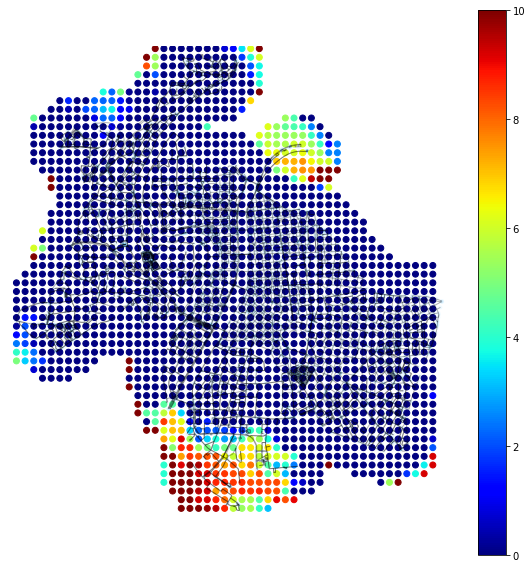

In [5]:
### Plot
f, ax = ox.plot_graph(osm_street_network, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.3, node_alpha=0.1)
# For visualization purposes, truncate maximum values
DISP_MAX = 10
indices_200.plot('dispersion', figsize=figsize, cmap='jet', legend=True, ax=ax, vmin=0, vmax=DISP_MAX)
f.tight_layout()

### Coarse-grained indices

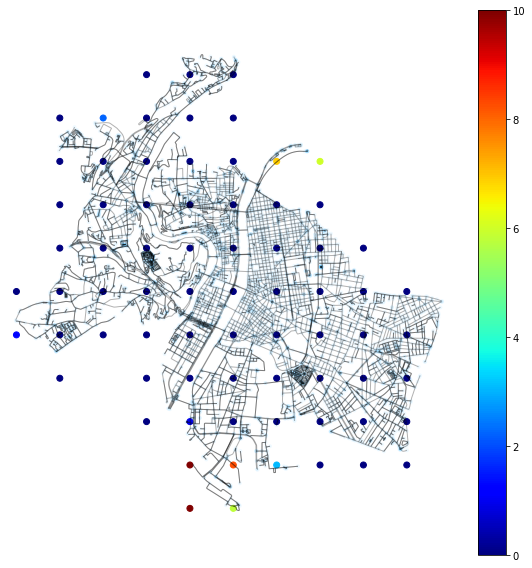

In [6]:
### Plot
f, ax = ox.plot_graph(osm_street_network, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.3, node_alpha=0.1)
# For visualization purposes, truncate maximum values
DISP_MAX = 10
indices_1000.plot('dispersion', figsize=figsize, cmap='jet', legend=True, ax=ax, vmin=0, vmax=DISP_MAX)
f.tight_layout()